<a href="https://colab.research.google.com/github/Pinegraphite123/TRGN515/blob/main/W5_HWproblems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using the GFF3 file that is well annotated, do:


#### W5-H17: Visualize the data as much as you can. How many genes/CDS/exon are listed for ENSEMBL and other datasets?


In [ ]:
!wget ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
!wget ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/README

--2024-02-17 18:06:50--  ftp://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/Homo_sapiens.GRCh38.85.gff3.gz
           => ‘Homo_sapiens.GRCh38.85.gff3.gz’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-85/gff3/homo_sapiens ... done.
==> SIZE Homo_sapiens.GRCh38.85.gff3.gz ... 38469475
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.85.gff3.gz ... done.
Length: 38469475 (37M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>]  36.69M  5.31MB/s    in 11s     

2024-02-17 18:07:04 (3.25 MB/s) - ‘Homo_sapiens.GRCh38.85.gff3.gz’ saved [38469475]

--2024-02-17 18:07:04--  http://ftp.ensembl.org/pub/release-85/gff3/homo_sapiens/README
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.

In [ ]:
!zcat ../datasets/Homo_sapiens.GRCh38.85.gff3.gz | head -n 250

gzip: ../datasets/Homo_sapiens.GRCh38.85.gff3.gz: No such file or directory


In [ ]:
import pandas as pd
pd.__version__ # good idea to report it when comparing code from different timestamps
col_names = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes'] #specified in README file
df = pd.read_csv('../content/Homo_sapiens.GRCh38.85.gff3.gz', compression='gzip',
                         sep='\t', comment='#', low_memory=False,
                         header=None, names=col_names)

In [ ]:
dff = df[df['type'].isin(['gene', 'exon', 'CDS'])]

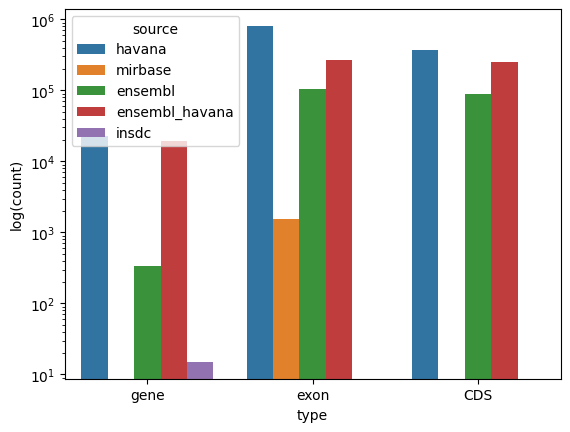

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x='type', data=dff, hue='source')
ax.set_yscale('log')
ax.set_ylabel('log(count)')
plt.show()

#### W5-H18: Plot a histogram of length information for a) entire genome, 2) for each source, i.e., ENSEMBL, Havana, etc. separately (can use subplot)

In [ ]:
import seaborn as sns
df["length"] = df["end"] - df["start"] + 1
df

,seqid,source,type,start,end,score,strand,phase,attributes,length
0,1,GRCh38,chromosome,1,248956422,.,.,.,"ID=chromosome:1;Alias=CM000663.2,chr1,NC_00000...",248956422
1,1,.,biological_region,10469,11240,1.3e+03,.,.,external_name=oe %3D 0.79;logic_name=cpg,772
2,1,.,biological_region,10650,10657,0.999,+,.,logic_name=eponine,8
3,1,.,biological_region,10655,10657,0.999,-,.,logic_name=eponine,3
4,1,.,biological_region,10678,10687,0.999,+,.,logic_name=eponine,10
...,...,...,...,...,...,...,...,...,...,...
2601844,Y,.,biological_region,26626966,26627137,0.994,-,.,external_name=rank %3D 1;logic_name=firstef,172
2601845,Y,.,biological_region,26627457,26628186,0.997,+,.,external_name=rank %3D 1;logic_name=firstef,730
2601846,Y,havana,gene,56855244,56855488,.,+,.,ID=gene:ENSG00000235857;Name=CTBP2P1;biotype=p...,245
2601847,Y,havana,processed_pseudogene,56855244,56855488,.,+,.,ID=transcript:ENST00000431853;Parent=gene:ENSG...,245


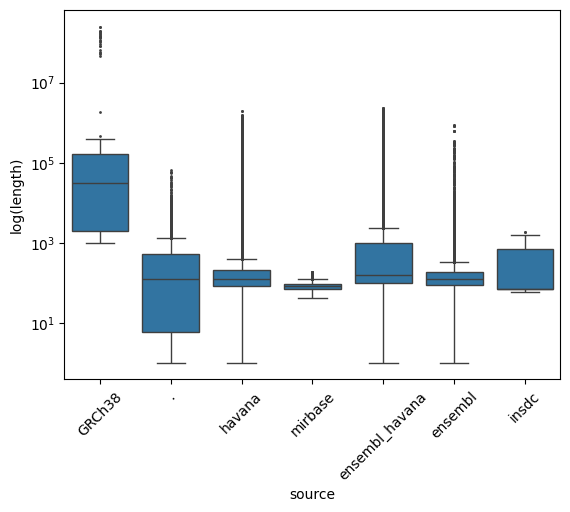

In [ ]:
import seaborn as sns

### Cannot plot histgram due to memory limitation, the session will just crash
### outliers are removed

ax = sns.boxplot(x="source", y="length", data=df, fliersize=1)
ax.set_yscale('log')
ax.set_ylabel('log(length)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
havana_df = df[df['source'] == 'havana']
havana_df = havana_df.reset_index()
grch_df = df[df['source'] == 'GRCh38']
grch_df = grch_df.reset_index()
mir_df = df[df['source'] == 'mirbase']
mir_df = mir_df.reset_index()
ensembl_df = df[df['source'] == 'ensembl']
ensembl_df = ensembl_df.reset_index()
insdc_df = df[df['source'] == 'insdc']
insdc_df = insdc_df.reset_index()
eh_df = df[df['source'] == 'ensembl_havana']
eh_df = eh_df.reset_index()

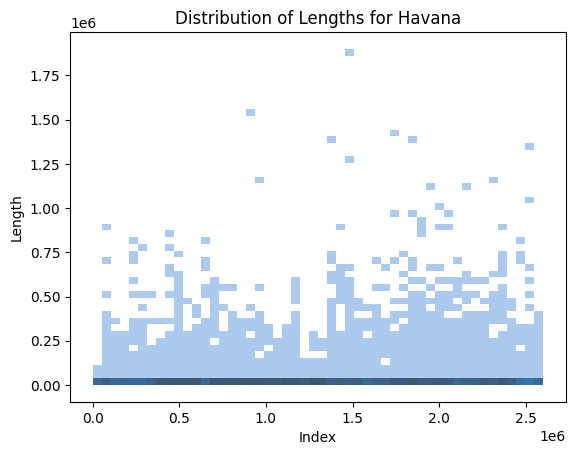

In [ ]:
sns.histplot(data=havana_df, x='index', y='length', bins=50)
plt.title('Distribution of Lengths for Havana')
plt.xlabel('Index')
plt.ylabel('Length')
#plt.yscale('log')
plt.show()

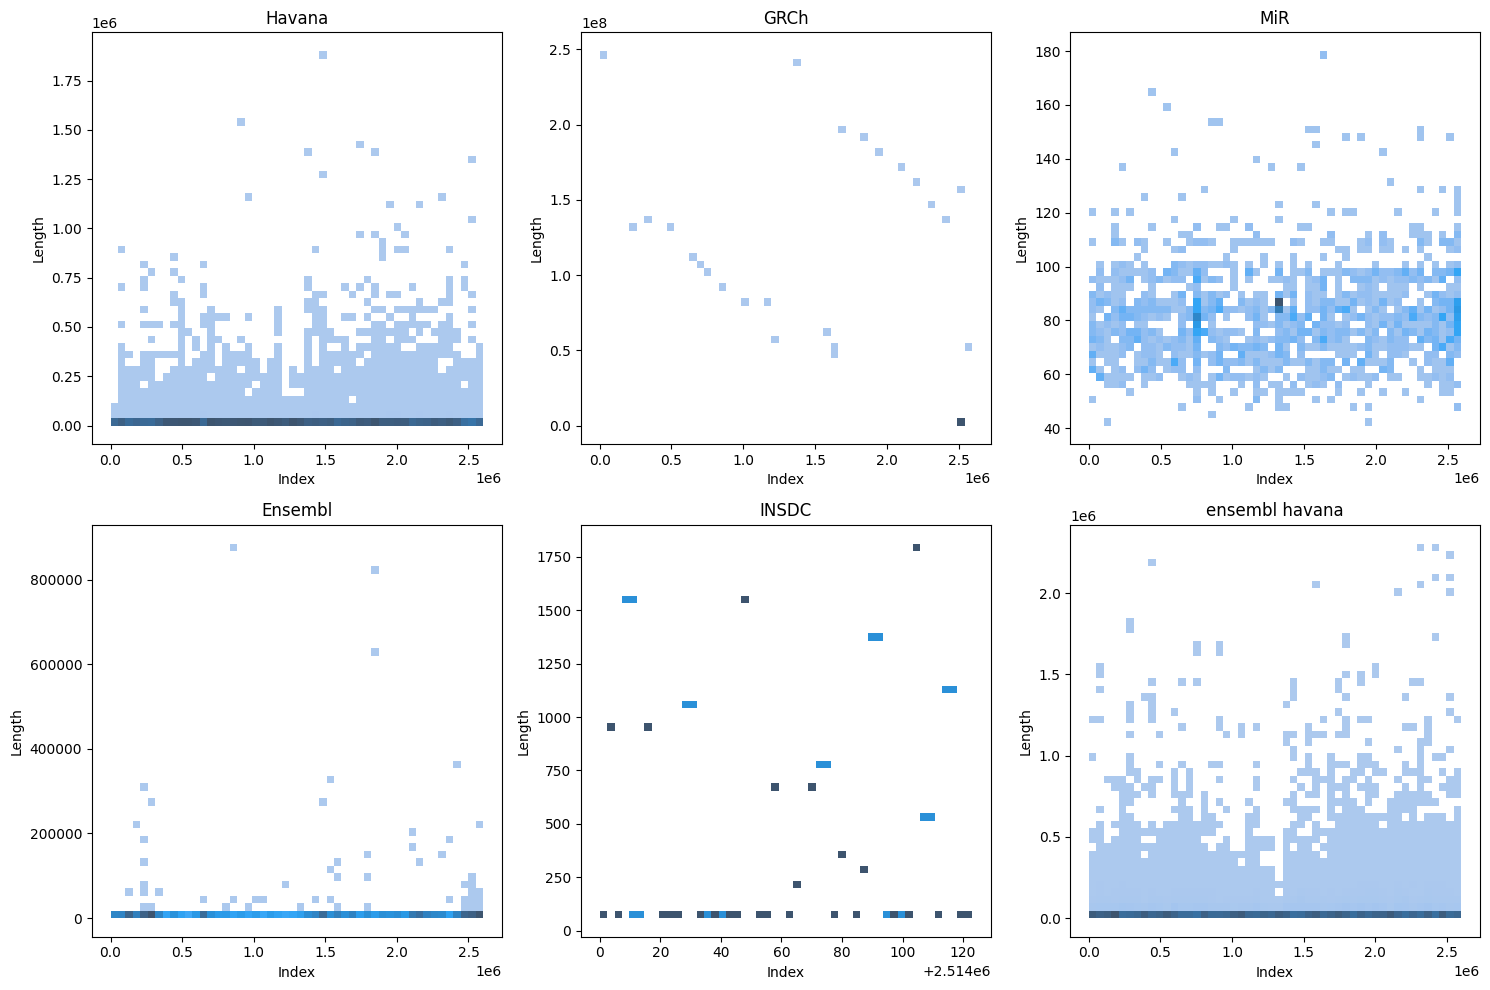

In [ ]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
dfs = [havana_df, grch_df, mir_df, ensembl_df, insdc_df, eh_df]
axes_flat = axes.flatten()
titles = ['Havana', 'GRCh', 'MiR', 'Ensembl', 'INSDC', 'ensembl havana']
for ax, df, title in zip(axes_flat, dfs, titles):
    sns.histplot(data=df, x='index', y='length', bins=50, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Index')
    ax.set_ylabel('Length')
plt.tight_layout()

### didnt set logy scale because the difference among length is too great, if set logy, some are not visible at all

#### W5-H19:  

Can you generate the following for the mirbase entries in the pandas dataframe?

1) count and length information of the genes,
2) a visualisation of the length distribution across the chromosomes,
3) information on the shortest and longest genes?

Can you generate the following for the exons in the edf database?

1) count and length information of the exons,
2) a visualisation of the length distribution across the chromosomes,
3) information on the shortest and longest exons?


In [ ]:
mir_df.type.value_counts()

miRNA_gene    1567
miRNA         1567
exon          1567
Name: type, dtype: int64

<Axes: xlabel='length', ylabel='Count'>

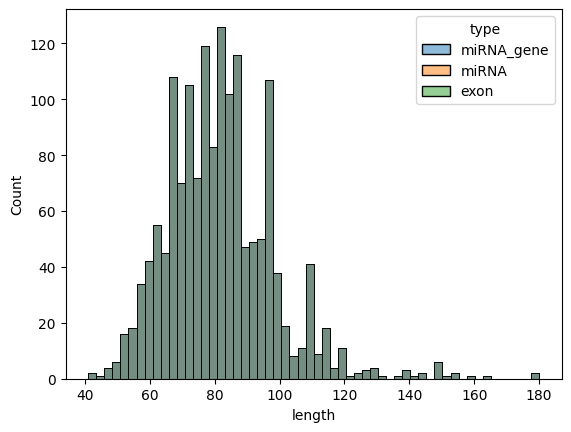

In [ ]:
sns.histplot(data=mir_df, x="length", hue='type')

### these three types of nucleotide have the length distribution

<Axes: xlabel='length', ylabel='Count'>

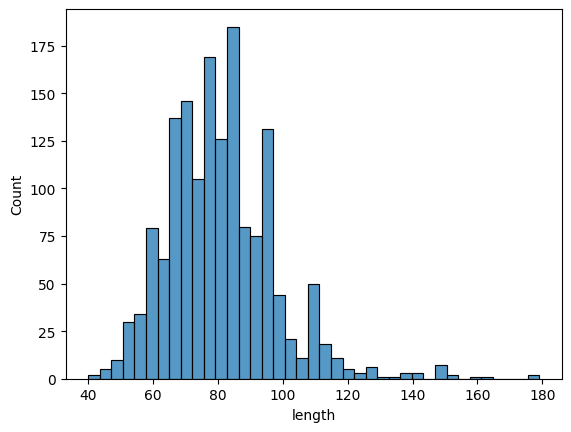

In [ ]:
mirmirnagene = mir_df[mir_df['type'] == 'miRNA_gene']
sns.histplot(data=mirmirnagene, x="length")

### these three types of nucleotide have the length distribution

In [ ]:
df

,index,seqid,source,type,start,end,score,strand,phase,attributes,length
0,51,1,ensembl_havana,lincRNA_gene,29554,31109,.,+,.,ID=gene:ENSG00000243485;Name=MIR1302-2;biotype...,1556
1,52,1,ensembl_havana,lincRNA,29554,31097,.,+,.,ID=transcript:ENST00000473358;Parent=gene:ENSG...,1544
2,56,1,ensembl_havana,lincRNA,30267,31109,.,+,.,ID=transcript:ENST00000469289;Parent=gene:ENSG...,843
3,59,1,ensembl_havana,miRNA,30366,30503,.,+,.,ID=transcript:ENST00000607096;Parent=gene:ENSG...,138
4,77,1,ensembl_havana,gene,69091,70008,.,+,.,ID=gene:ENSG00000186092;Name=OR4F5;biotype=pro...,918
...,...,...,...,...,...,...,...,...,...,...,...
745060,2601706,Y,ensembl_havana,gene,25975549,25988069,.,+,.,ID=gene:ENSG00000172283;Name=PRYP4;biotype=unp...,12521
745061,2601707,Y,ensembl_havana,pseudogene,25975549,25988069,.,+,.,ID=transcript:ENST00000306589;Parent=gene:ENSG...,12521
745062,2601708,Y,ensembl_havana,exon,25975549,25975617,.,+,.,Parent=transcript:ENST00000306589;Name=ENSE000...,69
745063,2601709,Y,ensembl_havana,exon,25978204,25978319,.,+,.,Parent=transcript:ENST00000306589;Name=ENSE000...,116


In [ ]:
mir_df_sorted = mir_df.sort_values(by='seqid', ascending=True)
mir_df_sorted = mir_df_sorted.reset_index()
order = sorted(mir_df_sorted['seqid'].unique(), key=lambda x:[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,"X"])
order

### cannot seem to fix the order issue

In [ ]:
mir_df_sorted['seqid'] = pd.Categorical(mir_df_sorted['seqid'], ordered=True, categories=order)

<Axes: xlabel='seqid', ylabel='length'>

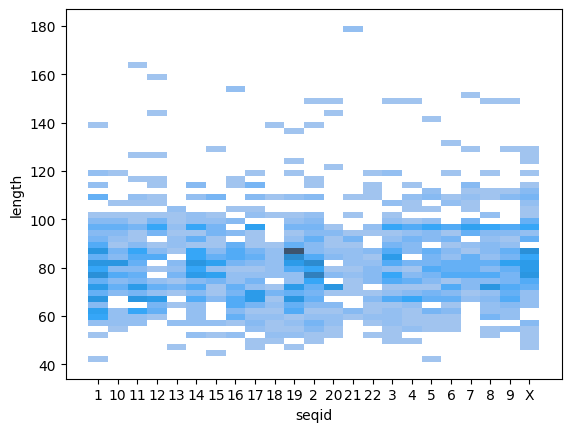

In [ ]:
sns.histplot(data=mir_df_sorted, y="length", x='seqid')

### these length make sense since microRNA is about this long, 2 to low 3 digits.
### miRNA is exported out to cytoplasm to bind with RISC complex, this compound then bind to complementary mRNA, leading to degradation of the target mRNA.

In [ ]:
# largest and smallest length
print(mir_df_sorted['length'].max(), mir_df_sorted['length'].min())

180 41


In [ ]:
edf = df[df.source.isin(['ensembl', 'havana', 'ensembl_havana'])]

In [ ]:
edf_sorted = edf.sort_values(by='seqid', ascending=True)

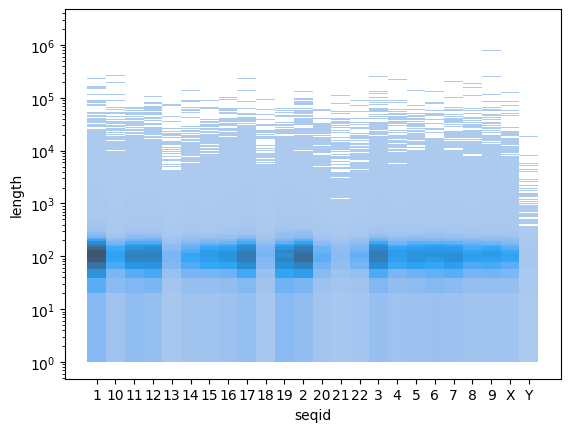

In [ ]:
sns.histplot(data=edf_sorted, y="length", x='seqid')
plt.yscale('log')

In [ ]:
print(edf_sorted['length'].max(), edf_sorted['length'].min())

See also

   #### [The GFF spec can be found here](https://www.sanger.ac.uk/resources/software/gff/spec.html)
   #### [A great explanation on the GFF format can be found here](http://gmod.org/wiki/GFF3)